## Predicting Credit defaulters using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has defaulted on credit card payments.

### Problem definition

In a statement,

> Given credit characteristics, can we predict whether a person has defaulted on their credit card payments?

### Data

The original data comes from Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found at the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

### Evaluation

> We can pursue the project if the accuracy levels are over 90%.

### Features

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.


There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

* PAY_0 and PAY_2–PAY_6: These columns show the status of repayments made by each credit-card customer whose details are listed in the dataset. The six columns cover repayments made from April 2005 through September 2005, in reverse order. For example, PAY_0 indicates a customer's repayment status in September 2005 and PAY_6 indicates the customer's repayment status in April 2005.

* In each of the six PAY_X columns, the status code -1 means that payment was made on time and the
code 1 means that payment was delayed by one month. The codes 2 through 8 represent delays in
payment by two through eight months, respectively. And 9 means that payment was delayed by nine
or more months.

* PAY_0 should ideally be renamed to PAY_1. This will ensure that the PAY_X names conform to
the naming convention used for the BILL_AMTX and PAY_AMTX columns. It will also preclude any
questions about why PAY_0 is followed immediately by PAY_2.

* BILL_AMT1–BILL_AMT6: These columns list the amount billed to each customer from April 2005 through September 2005, in reverse order. The amounts are in New Taiwan (NT) dollars.

* PAY_AMT1–PAY_AMT6: These columns list, in reverse order, the amount that each customer paid back to the credit-card company from April 2005 through September 2005. Each of these amounts was paid to settle the preceding month's bill, either in full or partially. For example, each September 2005 amount was paid to settle the corresponding customer's August 2005 bill. The amounts are in NT dollars.

### Preparing tools for creating models

In [1]:
# Import all the tools we need 

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

### Loading the dataset

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.shape

(30000, 25)

### Data Exploration 

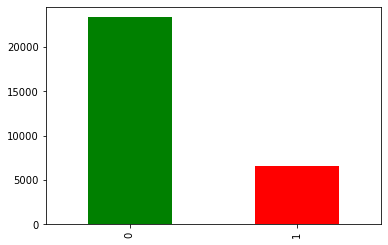

In [4]:
df["default.payment.next.month"].value_counts().plot(kind="bar",color=["green","red"]);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# Checking for missing values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### Default payment according to Sex

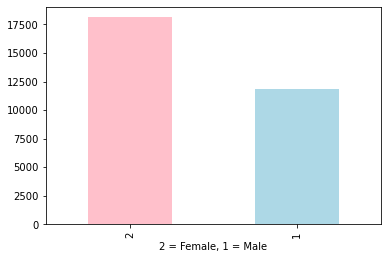

In [6]:
df["SEX"].value_counts().plot(kind="bar",color=["pink","lightblue"]);
plt.xlabel("2 = Female, 1 = Male");

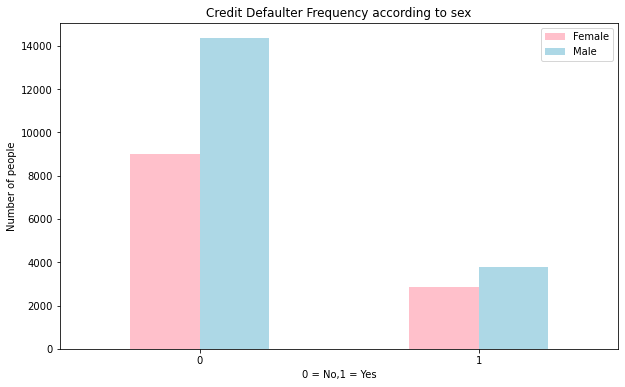

In [7]:
# Create a plot of above crosstab
pd.crosstab(df["default.payment.next.month"],df["SEX"]).plot(kind="bar",figsize=(10,6),color=["pink","lightblue"]);
plt.title("Credit Defaulter Frequency according to sex")
plt.xlabel("0 = No,1 = Yes")
plt.ylabel("Number of people")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

### Age vs Balance Limit for Credit Defaulters List

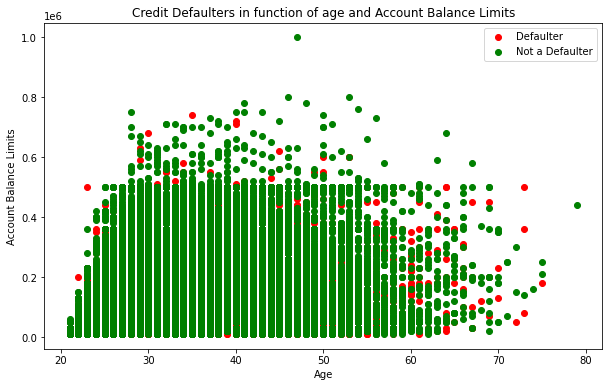

In [8]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive samples
plt.scatter(df.AGE[df["default.payment.next.month"]==1],
           df.LIMIT_BAL[df["default.payment.next.month"]==1],
           color="red");

# Scatter with negative samples
plt.scatter(df.AGE[df["default.payment.next.month"]==0],
           df.LIMIT_BAL[df["default.payment.next.month"]==0],
           color="green");

# Add helpful info about graph
plt.title("Credit Defaulters in function of age and Account Balance Limits")
plt.xlabel("Age")
plt.ylabel("Account Balance Limits")
plt.legend(["Defaulter","Not a Defaulter"]);

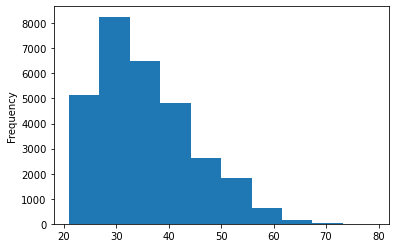

In [9]:
# Check the distribution of age column with a histogram
df["AGE"].plot.hist();

### Defaulter payment frequency per Repayment Status on months ranging from April to September 2005

* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)

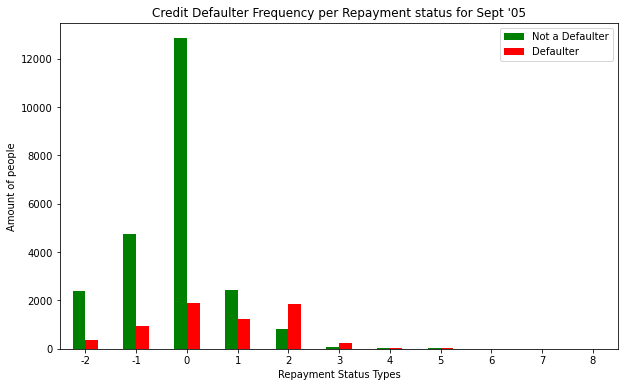

In [10]:
# Make the crosstab more visual
pd.crosstab(df["PAY_0"],df["default.payment.next.month"]).plot(kind="bar",figsize=(10,6),color=["green","red"]);
plt.title("Credit Defaulter Frequency per Repayment status for Sept '05")
plt.xlabel("Repayment Status Types")
plt.ylabel("Amount of people")
plt.legend(["Not a Defaulter","Defaulter"]);
plt.xticks(rotation=0);

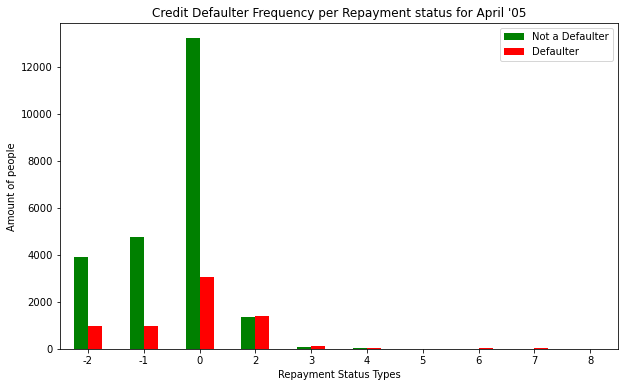

In [11]:
# Make the crosstab more visual
pd.crosstab(df["PAY_6"],df["default.payment.next.month"]).plot(kind="bar",figsize=(10,6),color=["green","red"]);
plt.title("Credit Defaulter Frequency per Repayment status for April '05")
plt.xlabel("Repayment Status Types")
plt.ylabel("Amount of people")
plt.legend(["Not a Defaulter","Defaulter"]);
plt.xticks(rotation=0);

In [12]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


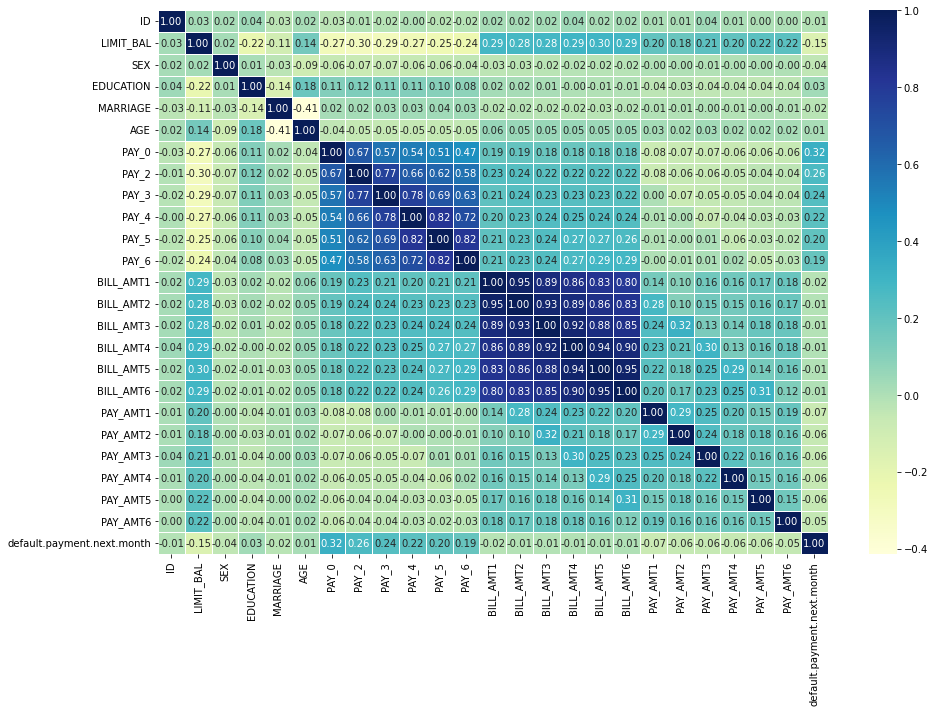

In [13]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

### Modeling

In [14]:
# Split data into Features and labels and then do the train and test splits
X = df.drop("default.payment.next.month",axis=1)
y = df["default.payment.next.month"]

np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

We will be trying our 3 different machine learning models:

1. Logistic Regression
2. K Neighbors Classifier
3. Random Forest Classifier

In [15]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest Classifier": RandomForestClassifier()}

# Create Function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different Sci-kit learn models.
    X_train: training data (No labels)
    X_test: testing data (No labels)
    y_train: training labels
    y_test: test labels
    """

    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_Scores
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores

In [16]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

model_scores

C:\Users\Avi\Desktop\Self_Project\Credit-Card-Defaulter-Prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7811666666666667,
 'KNN': 0.7508333333333334,
 'Random Forest Classifier': 0.8136666666666666}

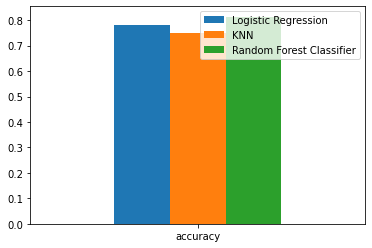

In [17]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.plot.bar();
plt.xticks(rotation=0);

### Hyperparameter Tuning (By Hand)

In [18]:
# Try tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors.
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update the train Scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [19]:
train_scores

[1.0,
 0.84275,
 0.843625,
 0.8145833333333333,
 0.8155833333333333,
 0.8035833333333333,
 0.803625,
 0.7963333333333333,
 0.7970416666666666,
 0.7924583333333334,
 0.7946666666666666,
 0.791,
 0.7907916666666667,
 0.7892916666666666,
 0.7892083333333333,
 0.7877083333333333,
 0.7878333333333334,
 0.7860416666666666,
 0.7860416666666666,
 0.7855416666666667]

In [20]:
test_scores

[0.6901666666666667,
 0.7685,
 0.7346666666666667,
 0.7701666666666667,
 0.7508333333333334,
 0.7701666666666667,
 0.7611666666666667,
 0.7728333333333334,
 0.7651666666666667,
 0.7758333333333334,
 0.7698333333333334,
 0.7793333333333333,
 0.7743333333333333,
 0.779,
 0.7773333333333333,
 0.781,
 0.7805,
 0.7805,
 0.7763333333333333,
 0.7811666666666667]

Maximum KNN score on the test data: 78.12%


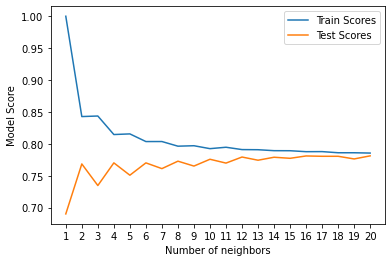

In [21]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1,21,1)) 
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

We have a 3% approximate increase in the score obtained from before for K-Neighbors-Classifier. However, we still have a higher score from the Random Forest Classifier Model.

### Hyperparameter Tuning using RandomSearchCV()

We will be tuning the LogisticRegression() and RandomForestClassifier() models using RandomSearchCV().

In [23]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [25]:
# Tune LogisticRegression()
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [26]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [27]:
rs_log_reg.score(X_test,y_test)

0.7811666666666667

The logistic regression score obtained above is exactly this one. Lets try to tune the RandomForestClassifier() model.

In [28]:
# Setup random Seed
np.random.seed(42)

# Setup random hyperparameter search grid for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,n_iter=20,cv=5,verbose=True)

# Fit random Forest Classifier model with RandomizedSearchCV
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [29]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [30]:
rs_rf.score(X_test,y_test)

0.8188333333333333

In [31]:
model_scores # Baseline scores for baseline models created

{'Logistic Regression': 0.7811666666666667,
 'KNN': 0.7508333333333334,
 'Random Forest Classifier': 0.8136666666666666}

### Hyperparameter Tuning using GridSearchCV()

Since our RandomForestClassifier() model provides the best scores so far, we improve them using GridSearchCV().

In [22]:
# Different hyperparameters for our LogisticRegression model
rs_rf_grid = {"n_estimators": np.arange(500,600,50),
              "max_depth": [None],
              "min_samples_split": np.arange(12,18,2),
              "min_samples_leaf": np.arange(1,5,2)}

# Setup grid hyperparameter search for LogisticRegression
gs_rs_rf = GridSearchCV(RandomForestClassifier(),param_grid=rs_rf_grid,cv=5,verbose=True)

# Fit our grid hyperparameter search model
gs_rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': array([1, 3]),
                         'min_samples_split': array([12, 14, 16]),
                         'n_estimators': array([500, 550])},
             verbose=True)

In [23]:
gs_rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 550}

In [24]:
gs_rs_rf.score(X_test,y_test)

0.8213333333333334

### Evaluating our tuned Machine Learning Classifier (Beyond Accuracy)

* ROC and AUC
* Confusion Matrix
* Recall
* F1 Score
* Classification Report
* Use Cross-Validation wherever possible.

To make comparisons and evaluate our trained model, we need to make predictions.

In [25]:
# Make predictions on trained model
y_preds = gs_rs_rf.predict(X_test)

C:\Users\Avi\Desktop\Self_Project\Credit-Card-Defaulter-Prediction\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


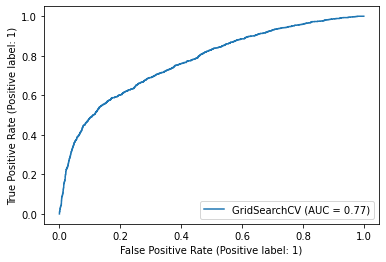

In [26]:
# Import ROC curve function from sklearn.metrics as done above, and then calculate the AUC metric
plot_roc_curve(gs_rs_rf,X_test,y_test);

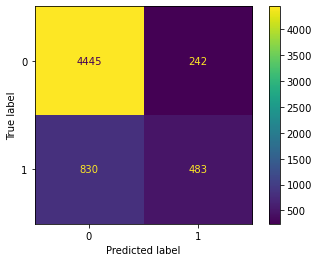

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
# Confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)
ConfusionMatrixDisplay.from_predictions(y_test,y_preds);

In [28]:
print(classification_report(y_preds,y_test));

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5275
           1       0.37      0.67      0.47       725

    accuracy                           0.82      6000
   macro avg       0.66      0.75      0.68      6000
weighted avg       0.88      0.82      0.84      6000



### Calculation of evaluation metrics

In [30]:
clf = RandomForestClassifier(n_estimators = 550,
                             min_samples_split = 16,
                             min_samples_leaf = 1,
                             max_depth = None)

In [31]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8189333333333334

In [32]:
# Cross-validated precision
cv_prc = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_prc = np.mean(cv_prc)
cv_prc

0.6840085472371895

In [33]:
# Cross-validated recall
cv_rec = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.3456950636002942

In [34]:
# Cross-validated f1 score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.4528274704695868

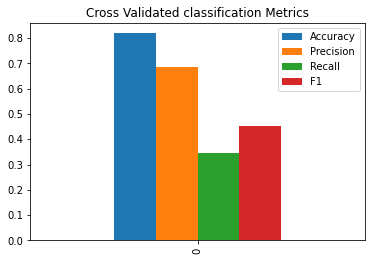

In [35]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prc,
                          "Recall": cv_rec,
                          "F1": cv_f1},index=[0])

cv_metrics.plot.bar(title="Cross Validated classification Metrics");